# Area Plots , Histograms and Bar Plots

First we import our primary Modules `pandas` , `numpy` and `matplotlib`

In [1]:
import pandas as pd 
import numpy as np
import matplotlib as mlp
import matplotlib.pyplot as plt 
%matplotlib inline

Then Import our data 

In [2]:
df_can = pd.read_excel(
    'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/Canada.xlsx',
    sheet_name='Canada by Citizenship',
    skiprows=range(20),
    skipfooter=2)
print('Data downloaded and read into a dataframe!')

Data downloaded and read into a dataframe!


In [3]:
df_can.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1


In [4]:
#show the dimension of dataframe 
df_can.shape

(195, 43)

In [5]:
df_can.columns

Index([    'Type', 'Coverage',   'OdName',     'AREA', 'AreaName',      'REG',
        'RegName',      'DEV',  'DevName',       1980,       1981,       1982,
             1983,       1984,       1985,       1986,       1987,       1988,
             1989,       1990,       1991,       1992,       1993,       1994,
             1995,       1996,       1997,       1998,       1999,       2000,
             2001,       2002,       2003,       2004,       2005,       2006,
             2007,       2008,       2009,       2010,       2011,       2012,
             2013],
      dtype='object')

#### 1.Remove some features are not important for us in visualization as AREA, REG, DEV, Type and Coverage

In [6]:
df_can.drop(['AREA', 'REG','DEV','Type','Coverage'] ,axis=1 ,inplace = True)
df_can.head()

,OdName,AreaName,RegName,DevName,1980,1981,1982,1983,1984,1985,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1450,1223,856,702,560,716,561,539,620,603
2,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,1,1


#### 2.Rename some columns to make its name make sense.

In [7]:
df_can.rename(columns={'OdName':'Country','AreaName':'Continent','RegName':'Region'}, inplace=True)
df_can.head()

,Country,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1450,1223,856,702,560,716,561,539,620,603
2,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,1,1


#### 3.Ensure for consistency all columns labels is of type string 

In [8]:

for c in df_can.columns.tolist():
    if type(c) is not str :
        print(False)
        break
        

False


In [9]:
# another way 
all(isinstance(column ,str) for column in df_can.columns )

False

AS we see not all columns of type str so let's change them 

In [10]:
df_can.columns = list(map(str , df_can.columns))

In [11]:
all(isinstance(column ,str) for column in df_can.columns )

True

In [12]:
#Set country name as index
df_can.set_index('Country', inplace=True)
df_can.index.name=None
df_can.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1450,1223,856,702,560,716,561,539,620,603
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,0,1,1,0,0,0,0,1,1


#### 4.add total column

In [13]:
df_can['Total']=df_can.sum(axis=1)
df_can.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,15


In [14]:
df_can.shape

(195, 38)

as we see dimension of dataframe increase as we add new feature `Total`

In [15]:
# make a list of years that we will use it later
years = list(map(str ,range(1980,2014)))
years

['1980',
 '1981',
 '1982',
 '1983',
 '1984',
 '1985',
 '1986',
 '1987',
 '1988',
 '1989',
 '1990',
 '1991',
 '1992',
 '1993',
 '1994',
 '1995',
 '1996',
 '1997',
 '1998',
 '1999',
 '2000',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013']

# Area Plots

In the last module, we created a line plot that visualized the top 5 countries that contribued the most immigrants to Canada from 1980 to 2013. With a little modification to the code, we can visualize this plot as a cumulative plot, also knows as a **Stacked Line Plot** or **Area plot**.


In [16]:
df_can.sort_values(by='Total',ascending = False ,axis=0 , inplace =True)
top_5= df_can.head()
top_5 =top_5[years].transpose()
top_5.head()

,India,China,United Kingdom of Great Britain and Northern Ireland,Philippines,Pakistan
1980,8880,5123,22045,6051,978
1981,8670,6682,24796,5921,972
1982,8147,3308,20620,5249,1201
1983,7338,1863,10015,4562,900
1984,5704,1527,10170,3801,668


Area plots are stacked by default. And to produce a stacked area plot, each column must be either all positive or all negative values (any `NaN`, i.e. not a number, values will default to 0). To produce an unstacked plot, set parameter `stacked` to value `False`.


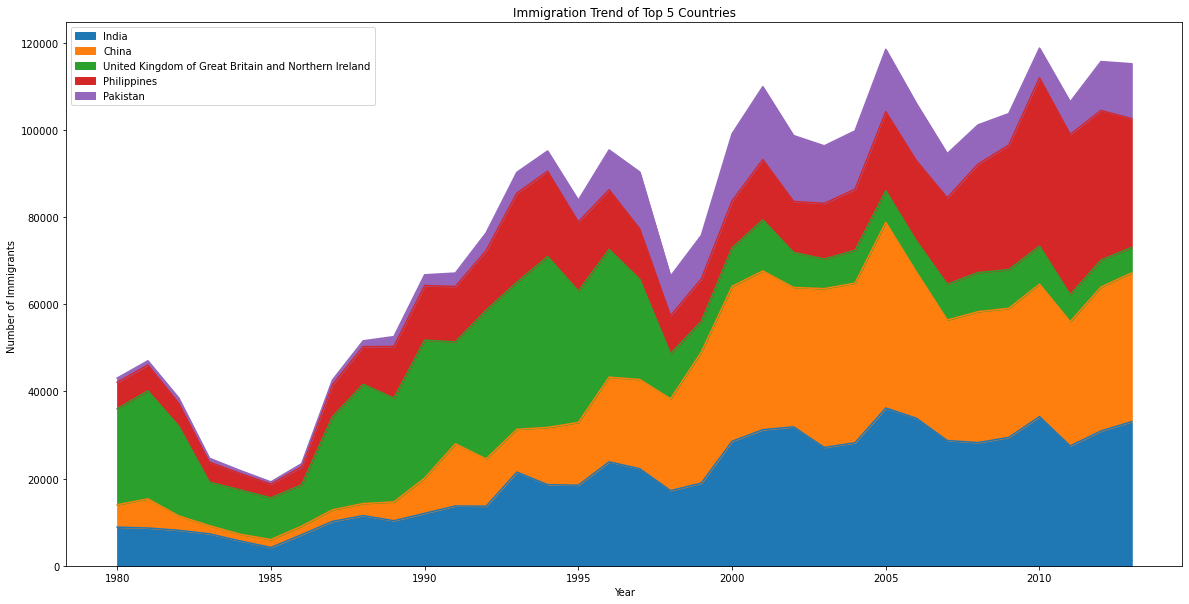

In [17]:
top_5.index =list(map(int, top_5.index)) ## convert index to int data type

top_5.plot(kind='area',figsize=(20,10))
plt.title('Immigration Trend of Top 5 Countries')
plt.xlabel('Year')
plt.ylabel('Number of Immigrants ')
plt.show()

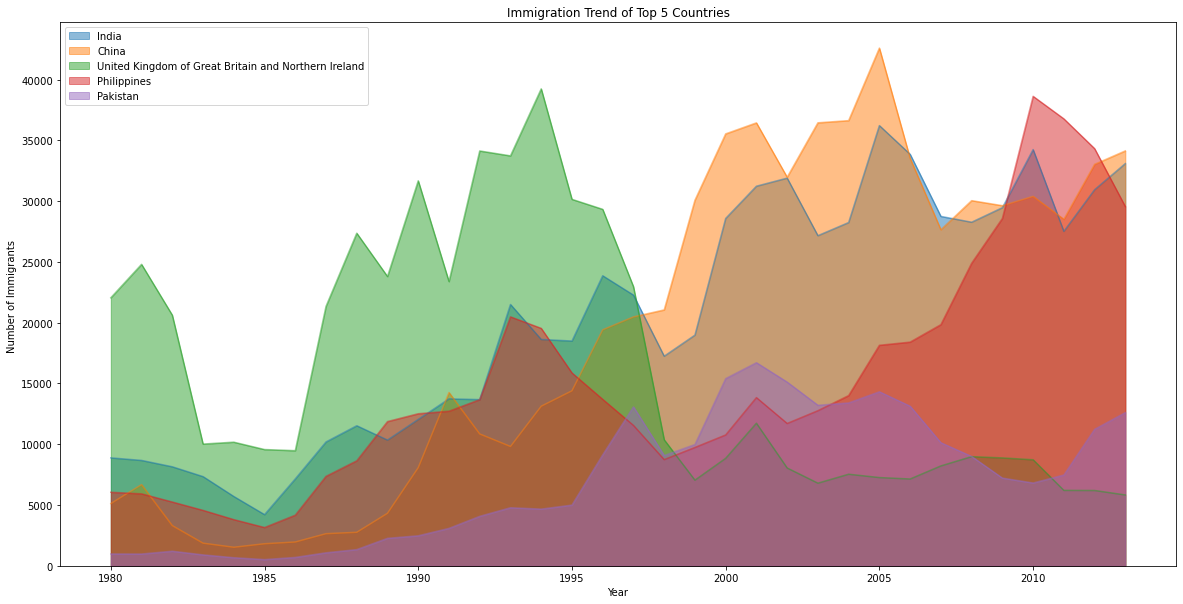

In [18]:
top_5.index =list(map(int, top_5.index)) ## convert index to int data type

top_5.plot(kind='area',figsize=(20,10) ,stacked =False) ## set staked= False
plt.title('Immigration Trend of Top 5 Countries')
plt.xlabel('Year')
plt.ylabel('Number of Immigrants ')
plt.show()

The unstacked plot has a default transparency (alpha value) at 0.5. We can modify this value by passing in the `alpha` parameter.


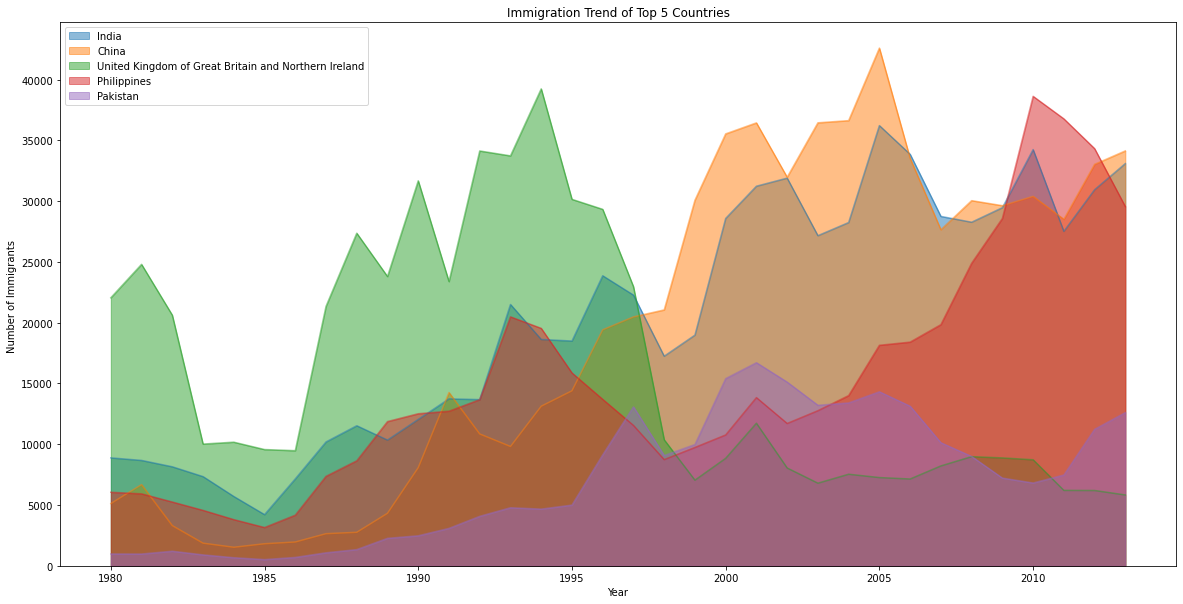

In [19]:
top_5.index =list(map(int, top_5.index)) ## convert index to int data type

top_5.plot(kind='area',figsize=(20,10) ,stacked =False ,alpha = .5) # 0 - 1, default value alpha = 0.5
plt.title('Immigration Trend of Top 5 Countries')
plt.xlabel('Year')
plt.ylabel('Number of Immigrants ')
plt.show()

### Two types of plotting
\*\*Option 1: Scripting layer (procedural method) - using matplotlib.pyplot as 'plt' \*\*

You can use `plt` i.e. `matplotlib.pyplot` and add more elements by calling different methods procedurally; for example, `plt.title(...)` to add title or `plt.xlabel(...)` to add label to the x-axis.

```python
    # Option 1: This is what we have been using so far
    df_top5.plot(kind='area', alpha=0.35, figsize=(20, 10)) 
    plt.title('Immigration trend of top 5 countries')
    plt.ylabel('Number of immigrants')
    plt.xlabel('Years')
```


\*\*Option 2: Artist layer (Object oriented method) - using an `Axes` instance from Matplotlib (preferred) \*\*

You can use an `Axes` instance of your current plot and store it in a variable (eg. `ax`). You can add more elements by calling methods with a little change in syntax (by adding "`set_`" to the previous methods). For example, use `ax.set_title()` instead of `plt.title()` to add title,  or `ax.set_xlabel()` instead of `plt.xlabel()` to add label to the x-axis.

This option sometimes is more transparent and flexible to use for advanced plots (in particular when having multiple plots, as you will see later).

In this course, we will stick to the **scripting layer**, except for some advanced visualizations where we will need to use the **artist layer** to manipulate advanced aspects of the plots.


Text(0.5, 0, 'Years')

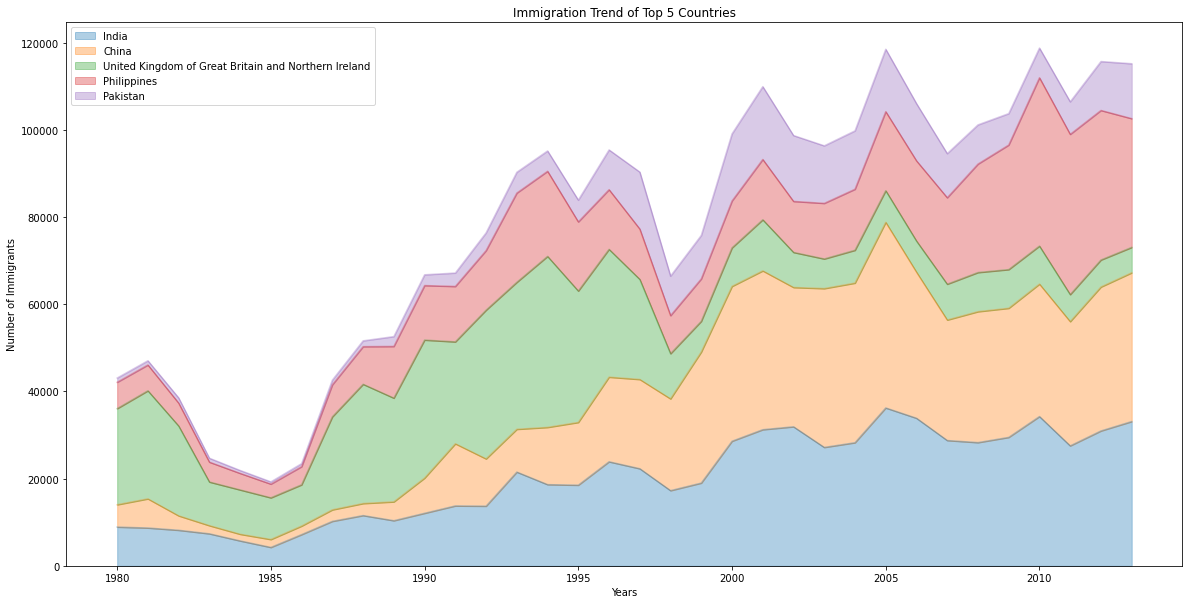

In [20]:
# option 2: preferred option with more flexibility
ax =top_5.plot(kind='area',alpha=0.35 ,figsize=(20,10))
ax.set_title('Immigration Trend of Top 5 Countries')
ax.set_ylabel('Number of Immigrants')
ax.set_xlabel('Years')

**Question**: Use the scripting layer to create a stacked area plot of the 5 countries that contributed the least to immigration to Canada from 1980 to 2013. Use a transparency value of 0.45.

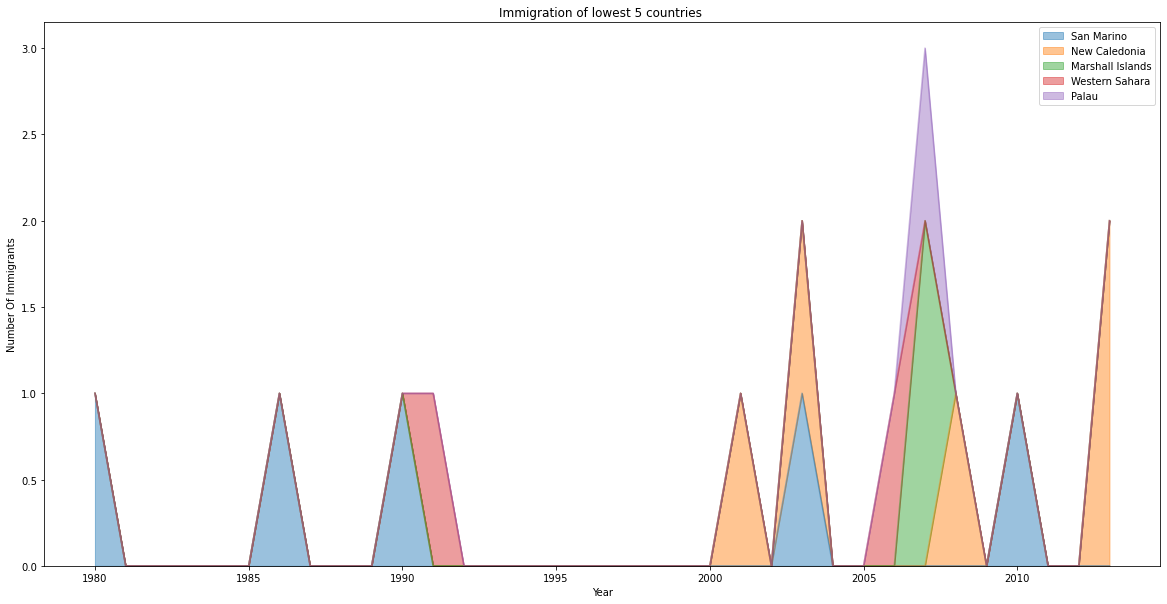

In [21]:
low_5 = df_can.tail()
low_5 = low_5[years].transpose()
low_5.index = list(map(int , low_5.index))
low_5.plot(kind='area', alpha = 0.45 , figsize=(20,10))
plt.title("Immigration of lowest 5 countries ")
plt.xlabel("Year")
plt.ylabel("Number Of Immigrants")
plt.show()

**Question**: Use the artist layer to create an unstacked area plot of the 5 countries that contributed the least to immigration to Canada **from** 1980 to 2013. Use a transparency value of 0.55.


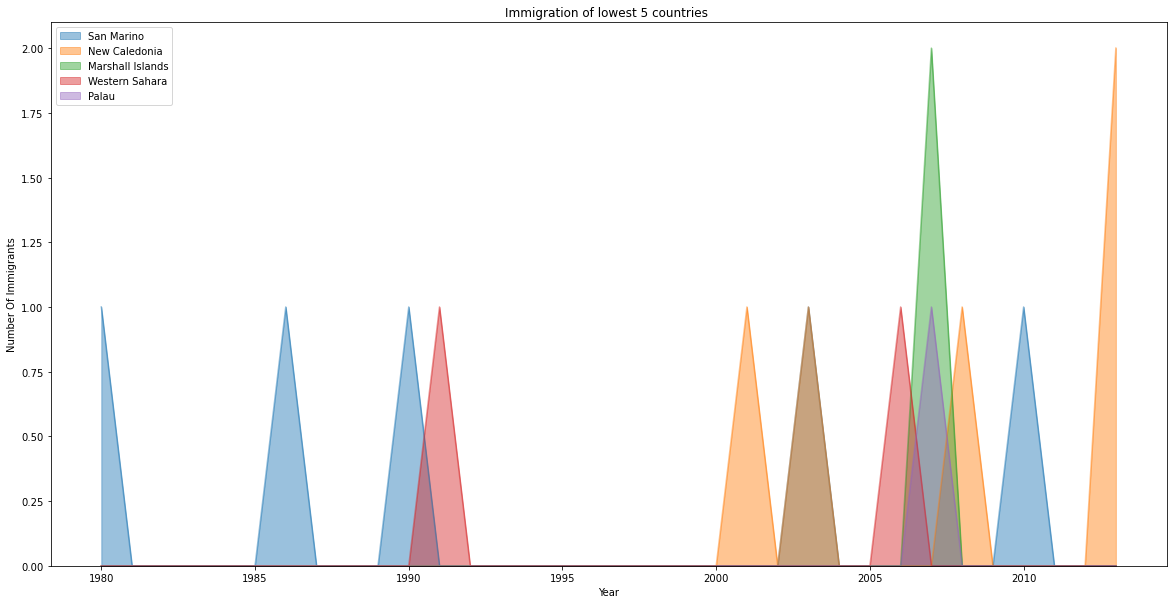

In [22]:
low_5 = df_can.tail()
low_5 = low_5[years].transpose()
low_5.index = list(map(int , low_5.index))
low_5.plot(kind='area', alpha = 0.45 , figsize=(20,10) ,  stacked = False)
plt.title("Immigration of lowest 5 countries ")
plt.xlabel("Year")
plt.ylabel("Number Of Immigrants")
plt.show()

# Histogram

A histogram is a way of representing the *frequency* distribution of numeric dataset. The way it works is it partitions the x-axis into *bins*, assigns each data point in our dataset to a bin, and then counts the number of data points that have been assigned to each bin. So the y-axis is the frequency or the number of data points in each bin. Note that we can change the bin size and usually one needs to tweak it so that the distribution is displayed nicely.

**Question:** What is the frequency distribution of the number (population) of new immigrants from the various countries to Canada in 2013?


Before we proceed with creating the histogram plot, let's first examine the data split into intervals. To do this, we will us **Numpy**'s `histrogram` method to get the bin ranges and frequency counts as follows:


In [23]:
df_can['2013'].head()

India                                                   33087
China                                                   34129
United Kingdom of Great Britain and Northern Ireland     5827
Philippines                                             29544
Pakistan                                                12603
Name: 2013, dtype: int64

In [24]:
# np.histogram returns 2 values
count , bin_edges = np.histogram(df_can['2013'])
print(count) # frequency count
print(bin_edges) # bin ranges, default = 10 bins

[178  11   1   2   0   0   0   0   1   2]
[    0.   3412.9  6825.8 10238.7 13651.6 17064.5 20477.4 23890.3 27303.2
 30716.1 34129. ]


By default, the `histrogram` method breaks up the dataset into 10 bins. The figure below summarizes the bin ranges and the frequency distribution of immigration in 2013. We can see that in 2013:

*   178 countries contributed between 0 to 3412.9 immigrants
*   11 countries contributed between 3412.9 to 6825.8 immigrants
*   1 country contributed between 6285.8 to 10238.7 immigrants, and so on..

<img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/labs/Module%202/images/Mod2Fig1-Histogram.jpg" align="center" width=800>


We can easily graph this distribution by passing `kind=hist` to `plot()`.


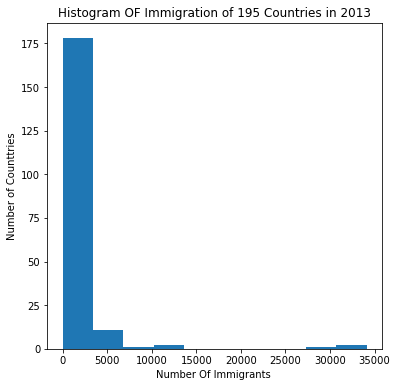

In [25]:
df_can['2013'].plot(kind = 'hist', figsize=(6,6))
plt.title('Histogram OF Immigration of 195 Countries in 2013')
plt.xlabel('Number Of Immigrants ')
plt.ylabel('Number of Counttries')
plt.show()

In the above plot, the x-axis represents the population range of immigrants in intervals of 3412.9. The y-axis represents the number of countries that contributed to the aforementioned population.

Notice that the x-axis labels do not match with the bin size. This can be fixed by passing in a `xticks` keyword that contains the list of the bin sizes, as follows:


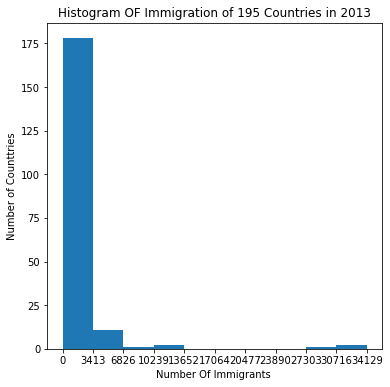

In [26]:
df_can['2013'].plot(kind = 'hist', figsize=(6,6) , xticks = bin_edges)
plt.title('Histogram OF Immigration of 195 Countries in 2013')
plt.xlabel('Number Of Immigrants ')
plt.ylabel('Number of Counttries')
plt.show()

*Side Note:* We could use `df_can['2013'].plot.hist()`, instead. In fact, throughout this lesson, using `some_data.plot(kind='type_plot', ...)` is equivalent to `some_data.plot.type_plot(...)`. That is, passing the type of the plot as argument or method behaves the same.

See the *pandas* documentation for more info  [http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.plot.html](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.plot.html?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDV0101ENSkillsNetwork20297740-2021-01-01).


We can also plot multiple histograms on the same plot. For example, let's try to answer the following questions using a histogram.

**Question**: What is the immigration distribution for Denmark, Norway, and Sweden for years 1980 - 2013?


In [27]:
df_can.loc[['Denmark','Norway','Sweden'], years].head()

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Denmark,272,293,299,106,93,73,93,109,129,129,...,89,62,101,97,108,81,92,93,94,81
Norway,116,77,106,51,31,54,56,80,73,76,...,73,57,53,73,66,75,46,49,53,59
Sweden,281,308,222,176,128,158,187,198,171,182,...,129,205,139,193,165,167,159,134,140,140


<AxesSubplot:ylabel='Frequency'>

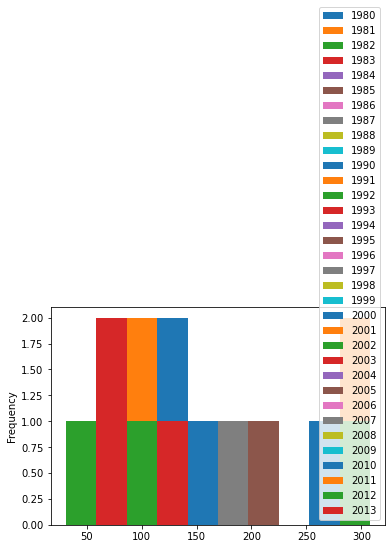

In [28]:
df_can.loc[['Denmark','Norway','Sweden'], years].plot.hist()

That does not look right!

Don't worry, you'll often come across situations like this when creating plots. The solution often lies in how the underlying dataset is structured.

Instead of plotting the population frequency distribution of the population for the 3 countries, *pandas* instead plotted the population frequency distribution for the `years`.

This can be easily fixed by first transposing the dataset, and then plotting as shown below.


In [29]:
df_t =df_can.loc[['Denmark','Norway','Sweden'], years].transpose()
df_t.head()

,Denmark,Norway,Sweden
1980,272,116,281
1981,293,77,308
1982,299,106,222
1983,106,51,176
1984,93,31,128


<AxesSubplot:ylabel='Frequency'>

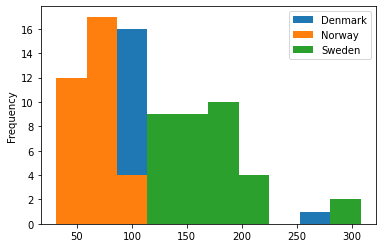

In [30]:
df_t.plot.hist()

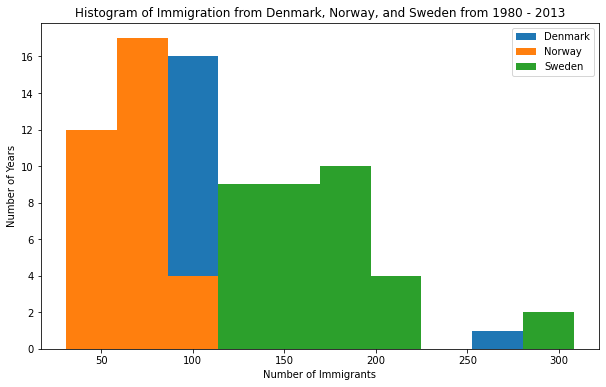

In [31]:
# generate histogram
df_t.plot(kind='hist', figsize=(10, 6))

plt.title('Histogram of Immigration from Denmark, Norway, and Sweden from 1980 - 2013')
plt.ylabel('Number of Years')
plt.xlabel('Number of Immigrants')

plt.show()

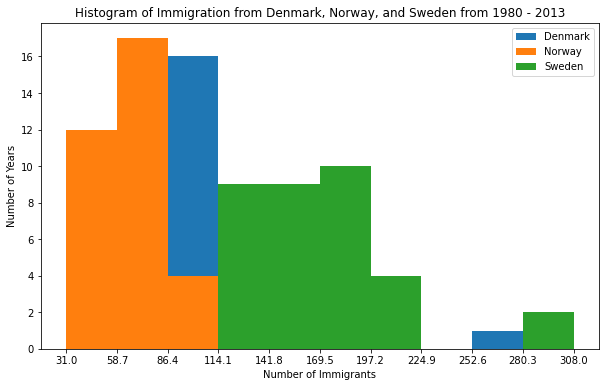

In [32]:
# generate histogram
count , bin_edges = np.histogram(df_t)
df_t.plot(kind='hist', figsize=(10, 6),xticks=bin_edges)

plt.title('Histogram of Immigration from Denmark, Norway, and Sweden from 1980 - 2013')
plt.ylabel('Number of Years')
plt.xlabel('Number of Immigrants')

plt.show()

Let's make a few modifications to improve the impact and aesthetics of the previous plot:

*   increase the bin size to 15 by passing in `bins` parameter;
*   set transparency to 60% by passing in `alpha` parameter;
*   label the x-axis by passing in `x-label` parameter;
*   change the colors of the plots by passing in `color` parameter.


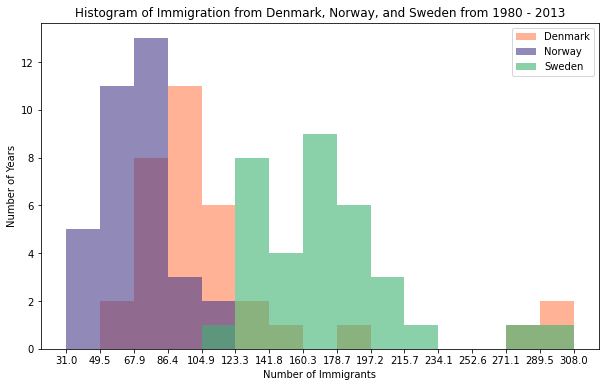

In [33]:
count , bin_edges = np.histogram(df_t ,15)
df_t.plot(kind = 'hist' ,figsize=(10 ,6) , bins = 15 ,xticks= bin_edges ,
          alpha =0.6 ,  color=['coral', 'darkslateblue', 'mediumseagreen'])

plt.title('Histogram of Immigration from Denmark, Norway, and Sweden from 1980 - 2013')
plt.ylabel('Number of Years')
plt.xlabel('Number of Immigrants')

plt.show()

Tip:
For a full listing of colors available in Matplotlib, run the following code in your python shell:

```python
import matplotlib
for name, hex in matplotlib.colors.cnames.items():
    print(name, hex)
```


In [34]:
## mlp as matplotlib
for name , hex in mlp.colors.cnames.items():
    print(name ,hex)

aliceblue #F0F8FF
antiquewhite #FAEBD7
aqua #00FFFF
aquamarine #7FFFD4
azure #F0FFFF
beige #F5F5DC
bisque #FFE4C4
black #000000
blanchedalmond #FFEBCD
blue #0000FF
blueviolet #8A2BE2
brown #A52A2A
burlywood #DEB887
cadetblue #5F9EA0
chartreuse #7FFF00
chocolate #D2691E
coral #FF7F50
cornflowerblue #6495ED
cornsilk #FFF8DC
crimson #DC143C
cyan #00FFFF
darkblue #00008B
darkcyan #008B8B
darkgoldenrod #B8860B
darkgray #A9A9A9
darkgreen #006400
darkgrey #A9A9A9
darkkhaki #BDB76B
darkmagenta #8B008B
darkolivegreen #556B2F
darkorange #FF8C00
darkorchid #9932CC
darkred #8B0000
darksalmon #E9967A
darkseagreen #8FBC8F
darkslateblue #483D8B
darkslategray #2F4F4F
darkslategrey #2F4F4F
darkturquoise #00CED1
darkviolet #9400D3
deeppink #FF1493
deepskyblue #00BFFF
dimgray #696969
dimgrey #696969
dodgerblue #1E90FF
firebrick #B22222
floralwhite #FFFAF0
forestgreen #228B22
fuchsia #FF00FF
gainsboro #DCDCDC
ghostwhite #F8F8FF
gold #FFD700
goldenrod #DAA520
gray #808080
green #008000
greenyellow #ADFF2F


If we do not want the plots to overlap each other, we can stack them using the `stacked` parameter. Let's also adjust the min and max x-axis labels to remove the extra gap on the edges of the plot. We can pass a tuple (min,max) using the `xlim` paramater, as show below.


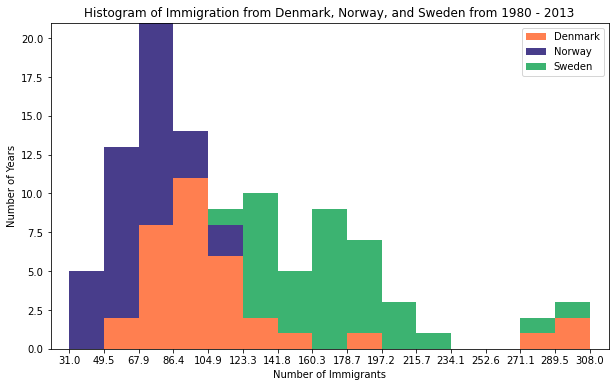

In [35]:
count, bin_edges = np.histogram(df_t, 15)
xmin = bin_edges[0] - 10   #  first bin value is 31.0, adding buffer of 10 for aesthetic purposes 
xmax = bin_edges[-1] + 10  #  last bin value is 308.0, adding buffer of 10 for aesthetic purposes

# stacked Histogram
df_t.plot(kind='hist',
          figsize=(10, 6), 
          bins=15,
          xticks=bin_edges,
          color=['coral', 'darkslateblue', 'mediumseagreen'],
          stacked=True,
          xlim=(xmin, xmax)
         )

plt.title('Histogram of Immigration from Denmark, Norway, and Sweden from 1980 - 2013')
plt.ylabel('Number of Years')
plt.xlabel('Number of Immigrants') 

plt.show()

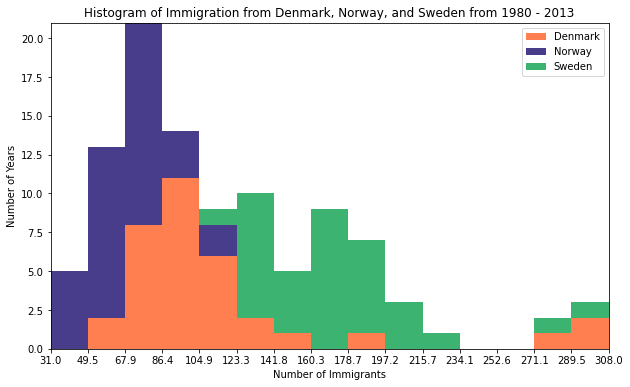

In [36]:
count, bin_edges = np.histogram(df_t, 15)
xmin = bin_edges[0]  
xmax = bin_edges[-1]
# stacked Histogram
df_t.plot(kind='hist',
          figsize=(10, 6), 
          bins=15,
          xticks=bin_edges,
          color=['coral', 'darkslateblue', 'mediumseagreen'],
          stacked=True,
          xlim=(xmin, xmax)
         )

plt.title('Histogram of Immigration from Denmark, Norway, and Sweden from 1980 - 2013')
plt.ylabel('Number of Years')
plt.xlabel('Number of Immigrants') 

plt.show()

Question: Use the scripting layer to display the immigration distribution for Greece, Albania, and Bulgaria for years 1980 - 2013? Use an overlapping plot with 15 bins and a transparency value of 0.35.

In [37]:
df_g = df_can.loc[['Greece','Albania','Bulgaria'],years]
df_g.head()

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Greece,1065,953,897,633,580,584,547,765,564,773,...,120,100,74,110,107,119,101,102,146,298
Albania,1,0,0,0,0,0,1,2,2,3,...,1450,1223,856,702,560,716,561,539,620,603
Bulgaria,24,20,12,33,11,24,33,52,43,85,...,2022,1738,1419,1172,994,784,556,365,451,512


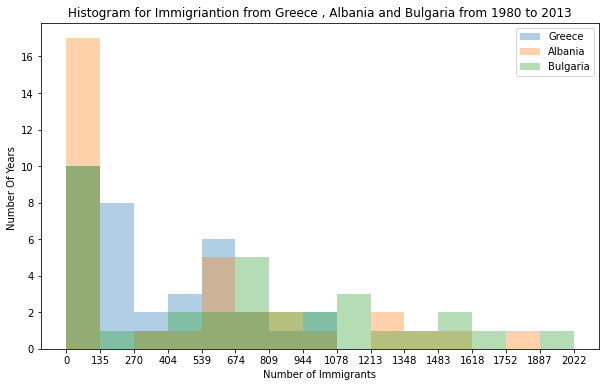

In [38]:
df_g =df_g.transpose()
count , bin_edges = np.histogram(df_g , 15)
xmin = bin_edges[0]-10
xmax= bin_edges[-1]+10
df_g.plot.hist(figsize=(10 ,6),bins =15 ,xticks= bin_edges, 
                alpha = 0.35 #, xlim =(xmin ,xmax) 
            # , color =['cadetblue' ,'chartreuse','chocolate' ] 
              )
plt.title('Histogram for Immigriantion from Greece , Albania and Bulgaria from 1980 to 2013')
plt.ylabel("Number Of Years ")
plt.xlabel("Number of Immigrants")
plt.show()

# Bar Charts (Dataframe) 

A bar plot is a way of representing data where the *length* of the bars represents the magnitude/size of the feature/variable. Bar graphs usually represent numerical and categorical variables grouped in intervals.

To create a bar plot, we can pass one of two arguments via `kind` parameter in `plot()`:

*   `kind=bar` creates a *vertical* bar plot
*   `kind=barh` creates a *horizontal* bar plot


**Vertical bar plot**

In vertical bar graphs, the x-axis is used for labelling, and the length of bars on the y-axis corresponds to the magnitude of the variable being measured. Vertical bar graphs are particularly useful in analyzing time series data. One disadvantage is that they lack space for text labelling at the foot of each bar.

**Let's start off by analyzing the effect of Iceland's Financial Crisis:**

The 2008 - 2011 Icelandic Financial Crisis was a major economic and political event in Iceland. Relative to the size of its economy, Iceland's systemic banking collapse was the largest experienced by any country in economic history. The crisis led to a severe economic depression in 2008 - 2011 and significant political unrest.

**Question:** Let's compare the number of Icelandic immigrants (country = 'Iceland') to Canada from year 1980 to 2013.


In [39]:
df_iceland =df_can.loc['Iceland',years]
df_iceland.head()

1980    17
1981    33
1982    10
1983     9
1984    13
Name: Iceland, dtype: object

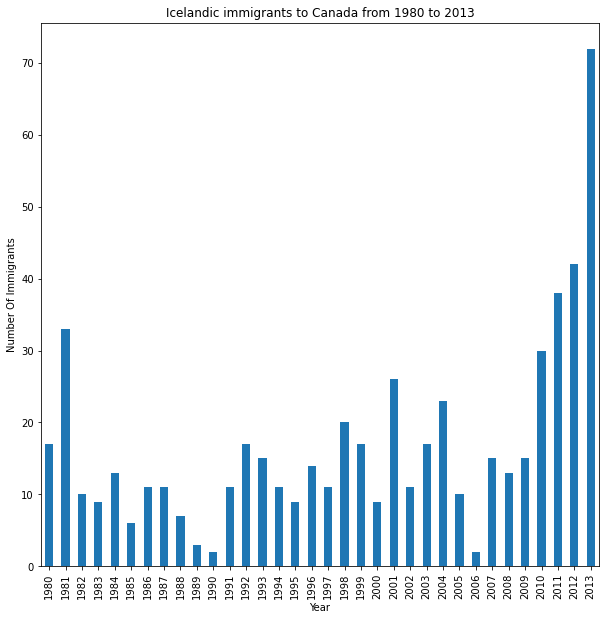

In [40]:
df_iceland.plot(kind='bar',figsize= (10 ,10))
plt.title('Icelandic immigrants to Canada from 1980 to 2013') # add title to the plot
plt.xlabel("Year")
plt.ylabel('Number Of Immigrants')
plt.show()

The bar plot above shows the total number of immigrants broken down by each year. We can clearly see the impact of the financial crisis; the number of immigrants to Canada started increasing rapidly after 2008.

Let's annotate this on the plot using the `annotate` method of the **scripting layer** or the **pyplot interface**. We will pass in the following parameters:

*   `s`: str, the text of annotation.
*   `xy`: Tuple specifying the (x,y) point to annotate (in this case, end point of arrow).
*   `xytext`: Tuple specifying the (x,y) point to place the text (in this case, start point of arrow).
*   `xycoords`: The coordinate system that xy is given in - 'data' uses the coordinate system of the object being annotated (default).
*   `arrowprops`: Takes a dictionary of properties to draw the arrow:
    *   `arrowstyle`: Specifies the arrow style, `'->'` is standard arrow.
    *   `connectionstyle`: Specifies the connection type. `arc3` is a straight line.
    *   `color`: Specifies color of arrow.
    *   `lw`: Specifies the line width.

I encourage you to read the Matplotlib documentation for more details on annotations:
<http://matplotlib.orsg/api/pyplot_api.html#matplotlib.pyplot.annotate>.


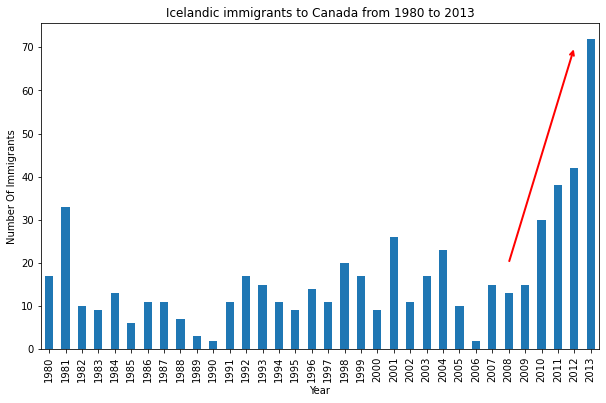

In [54]:
df_iceland.plot(kind='bar',figsize=(10,6),rot=90)
plt.title('Icelandic immigrants to Canada from 1980 to 2013') # add title to the plot
plt.xlabel("Year")
plt.ylabel('Number Of Immigrants')
##Annotate arrow
plt.annotate('',# s: str. Will leave it blank for no text
           xy =  ( 32,70), # place head of the arrow at point (year 2012 , pop 70)
          xytext= (28,20),# place base of the arrow at point (year 2008 , pop 20)
          xycoords='data',  # will use the coordinate system of the object being annotated
          arrowprops =dict(arrowstyle ='->' , connectionstyle ='arc3',color ='red' , lw =2)
            )
plt.show()            

Let's also annotate a text to go over the arrow.  We will pass in the following additional parameters:

*   `rotation`: rotation angle of text in degrees (counter clockwise)
*   `va`: vertical alignment of text \[‘center’ | ‘top’ | ‘bottom’ | ‘baseline’]
*   `ha`: horizontal alignment of text \[‘center’ | ‘right’ | ‘left’]


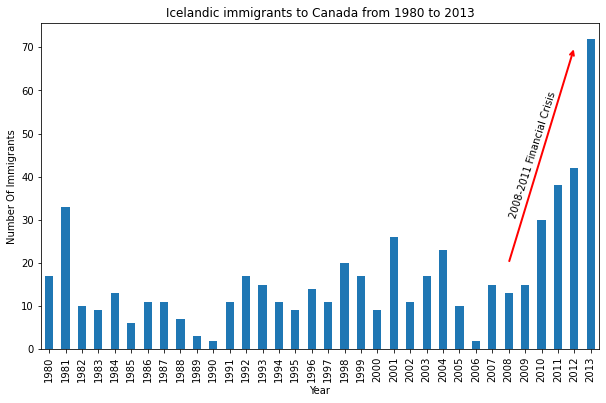

In [68]:
df_iceland.plot(kind='bar',figsize=(10,6),rot=90)
plt.title('Icelandic immigrants to Canada from 1980 to 2013') # add title to the plot
plt.xlabel("Year")
plt.ylabel('Number Of Immigrants')
##Annotate arrow
plt.annotate('',# s: str. Will leave it blank for no text
           xy =  ( 32,70), # place head of the arrow at point (year 2012 , pop 70)
          xytext= (28,20),# place base of the arrow at point (year 2008 , pop 20)
          xycoords='data',  # will use the coordinate system of the object being annotated
          arrowprops =dict(arrowstyle ='->' , connectionstyle ='arc3',color ='red' , lw =2)
            )
plt.annotate('2008-2011 Financial Crisis', #text to display
              xy=(28,30) , # start the text at at point (year 2008 , pop 30)
             rotation =72.5 ,
            va='bottom',  # want the text to be vertically 'bottom' aligned
             ha='left' )# want the text to be horizontally 'left' algned.
plt.show()

**Horizontal Bar Plot**

Sometimes it is more practical to represent the data horizontally, especially if you need more room for labelling the bars. In horizontal bar graphs, the y-axis is used for labelling, and the length of bars on the x-axis corresponds to the magnitude of the variable being measured. As you will see, there is more room on the y-axis to  label categorical variables.

**Question:** Using the scripting later and the `df_can` dataset, create a *horizontal* bar plot showing the *total* number of immigrants to Canada from the top 15 countries, for the period 1980 - 2013. Label each country with the total immigrant count.


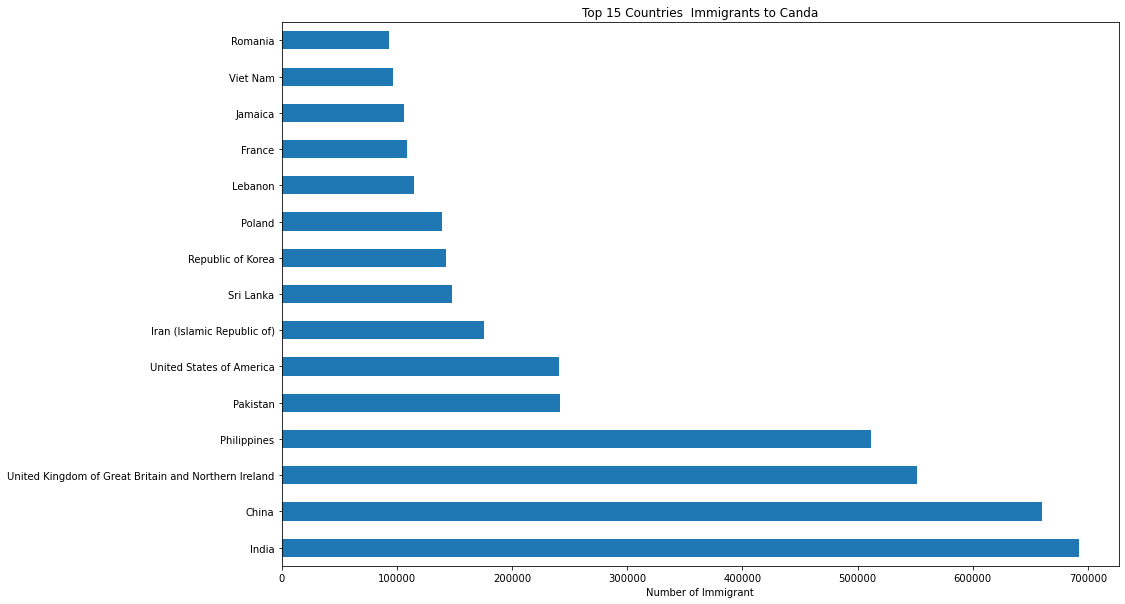

In [73]:
## df_can is already sorted in descending order 
df_top =df_can['Total'].head(15)
df_top.plot(kind='barh', figsize=(15 ,10))
plt.title('Top 15 Conuntries Contributing to the Immigration to Canada between 1980 - 2013')
##plt.ylabel("Country")
plt.xlabel('Number of Immigrant')
plt.show()

to make graph better 

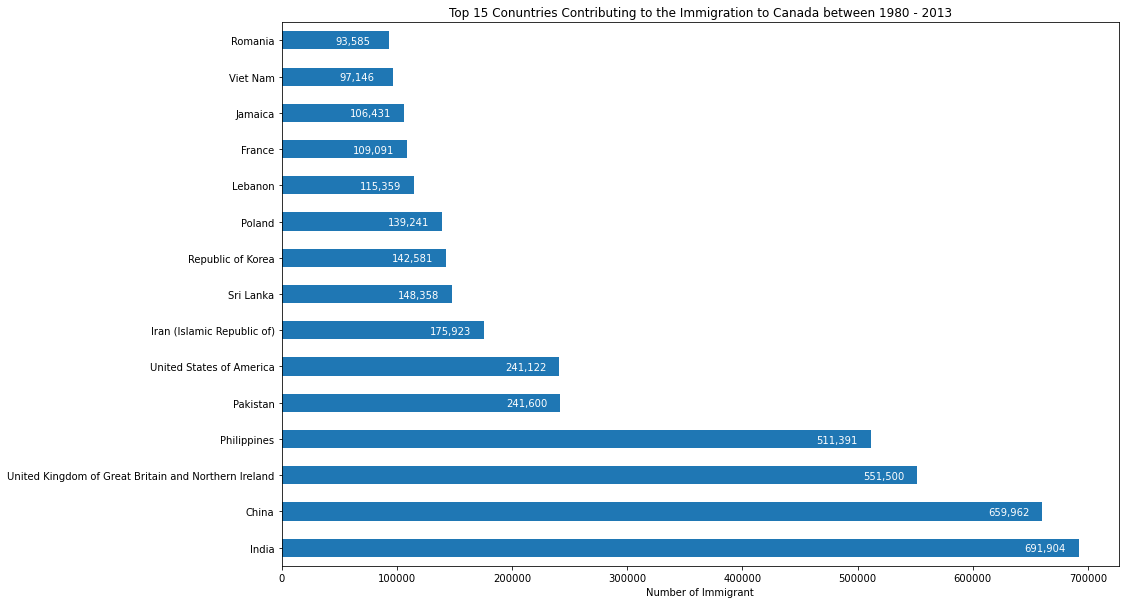

In [80]:
df_top.plot(kind='barh', figsize=(15 ,10))
plt.title('Top 15 Conuntries Contributing to the Immigration to Canada between 1980 - 2013')
##plt.ylabel("Country")
plt.xlabel('Number of Immigrant')
for index , value in enumerate(df_top):
    label = format(int(value), ',')
    plt.annotate(label, xy=(value - 47000, index - 0.10), color='white')               
     # place text at the end of bar (subtracting 47000 from x, and 0.1 from y to make it fit within the bar)              
                   
plt.show()

0 691904
1 659962
2 551500
3 511391
4 241600
5 241122
6 175923
7 148358
8 142581
9 139241
10 115359
11 109091
12 106431
13 97146
14 93585


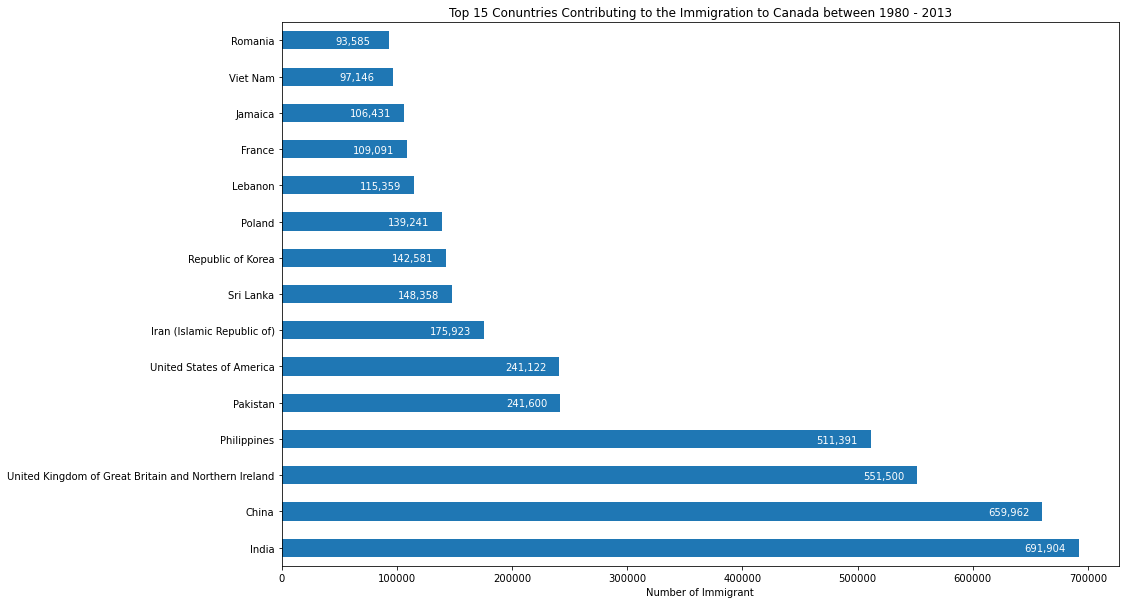

In [102]:
df_top.sort_values(axis=0, ascending =True) ## sort pandas series  
df_top.plot(kind='barh', figsize=(15 ,10))
plt.title('Top 15 Conuntries Contributing to the Immigration to Canada between 1980 - 2013')
##plt.ylabel("Country")
plt.xlabel('Number of Immigrant')
for index , value in enumerate(df_top):
    print(index ,value)
    label = format(int(value), ',') # to make number format as 123,250 not 123250
    plt.annotate(label, xy=(value - 47000, index - 0.10), color='white')               
     # place text at the end of bar (subtracting 47000 from x, and 0.1 from y to make it fit within the bar)              
                   
plt.show()

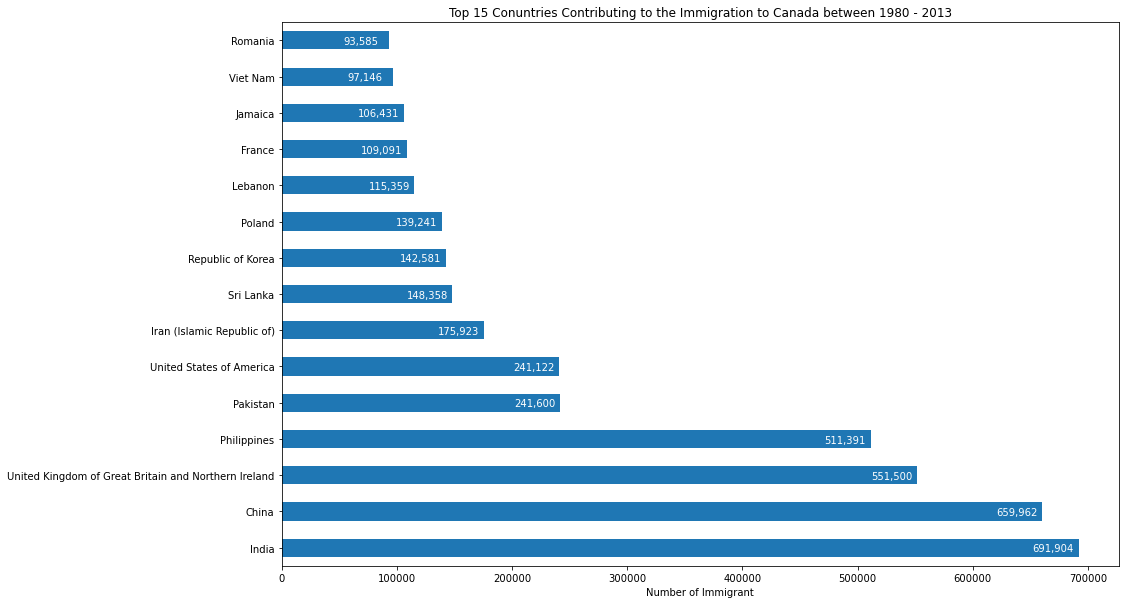

In [106]:
df_top.sort_values(axis=0, ascending =True) ## sort pandas series  
df_top.plot(kind='barh', figsize=(15 ,10))
plt.title('Top 15 Conuntries Contributing to the Immigration to Canada between 1980 - 2013')
##plt.ylabel("Country")
plt.xlabel('Number of Immigrant')
for index , value in enumerate(df_top):
    label = format(int(value), ',') # to make number format as 123,250 not 123250
    plt.annotate(label, xy=(value - 40000, index - 0.10), color='white')               
     # place text at the end of bar (subtracting 47000 from x, and 0.1 from y to make it fit within the bar)              
                   
plt.show()

**Question** Show Number OF Immigrants from Egypt  to canda from 1980 ,2013

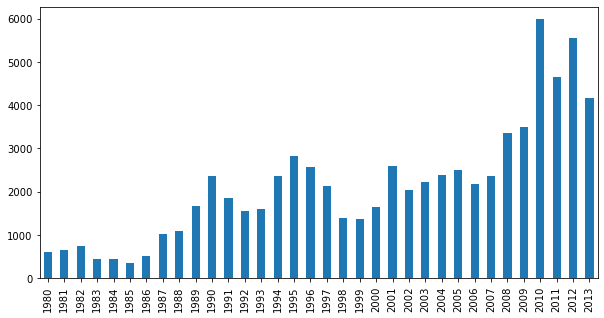

In [141]:
df_eg = df_can.loc['Egypt' , years]
df_eg.plot(kind='bar',figsize=(10,5))

plt.show()    

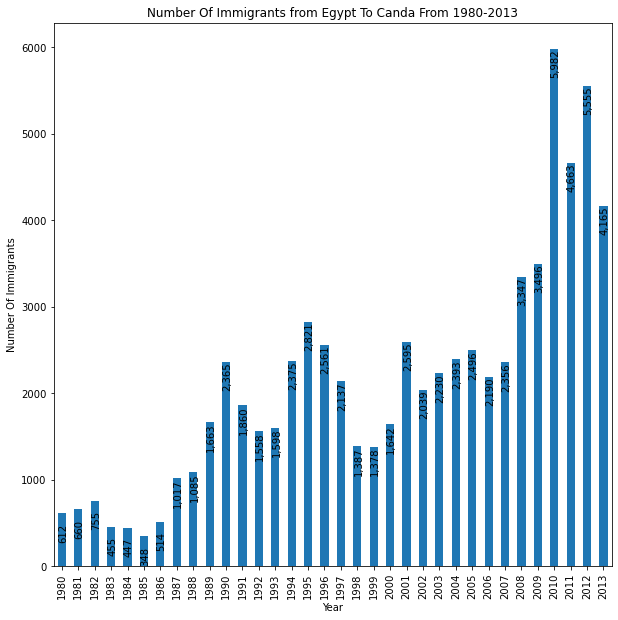

In [142]:
df_eg = df_can.loc['Egypt' , years]
df_eg.plot(kind='bar',figsize=(10,10))
plt.title('Number Of Immigrants from Egypt To Canda From 1980-2013')
plt.xlabel('Year')
plt.ylabel('Number Of Immigrants')
for index , value in enumerate(df_vit):
    label = format(int(value),',')
    plt.annotate(label , xy=(index -0.23  , value - 310) ,color='black', rotation=90)
plt.show()    